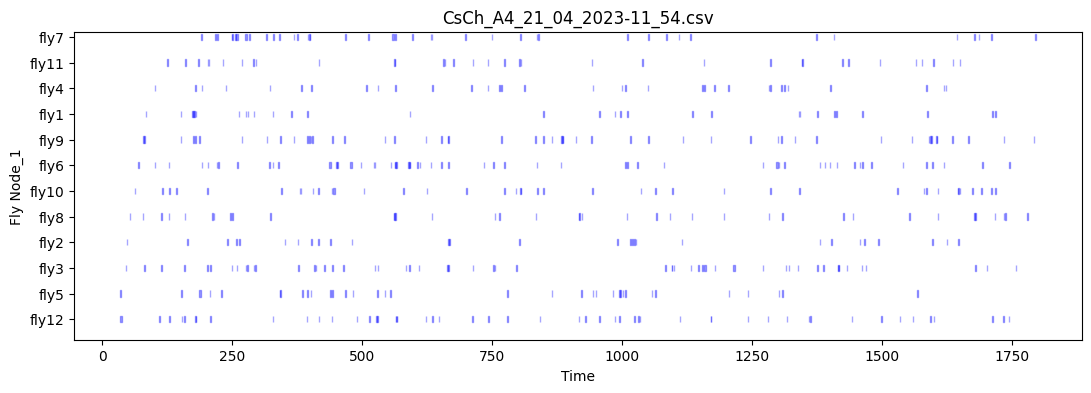

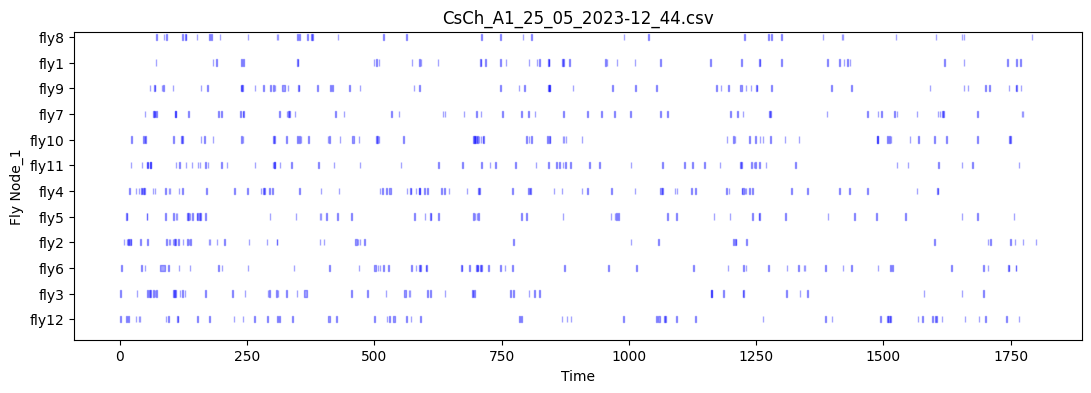

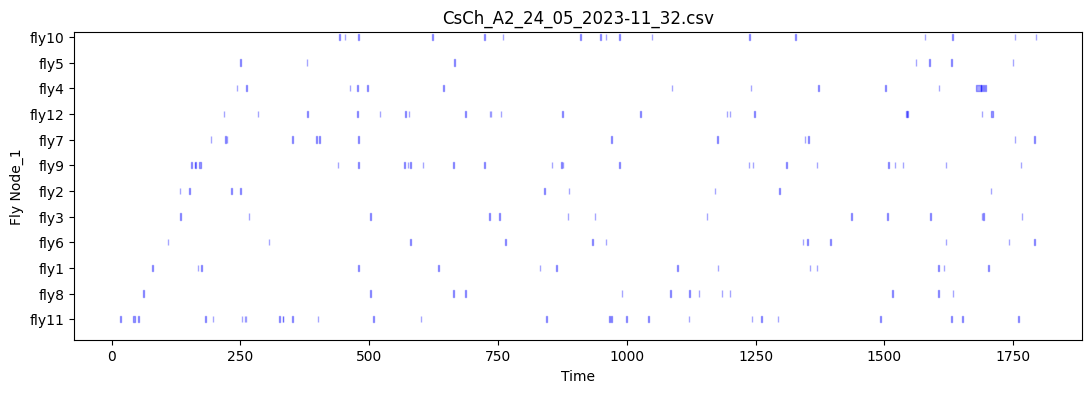

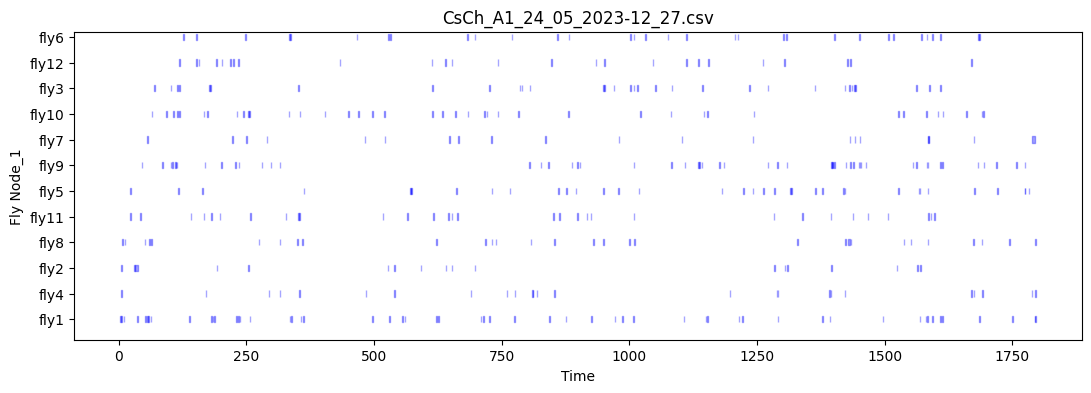

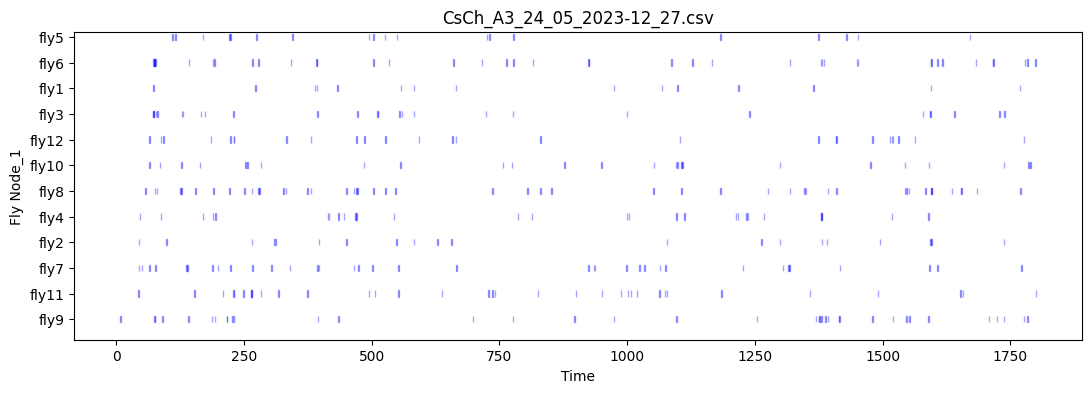

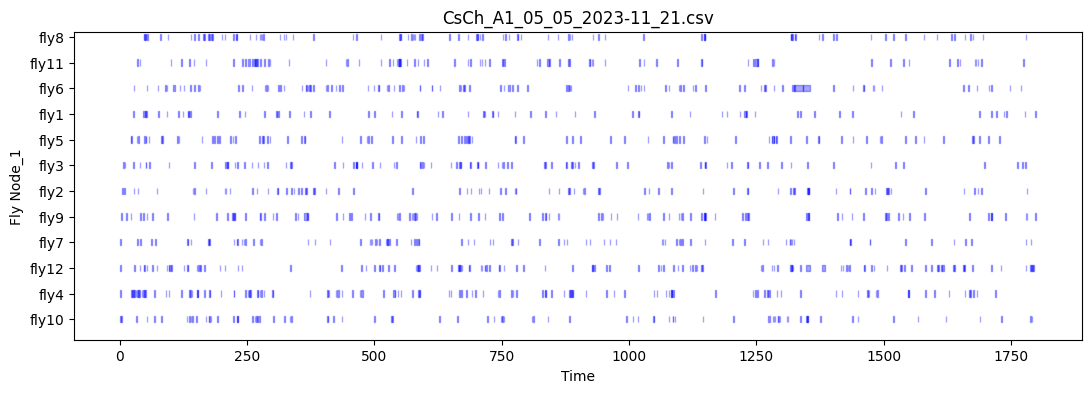

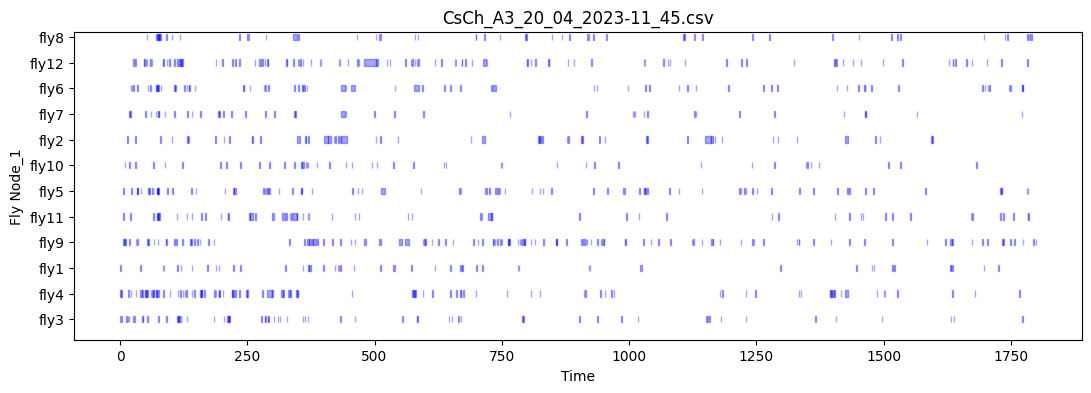

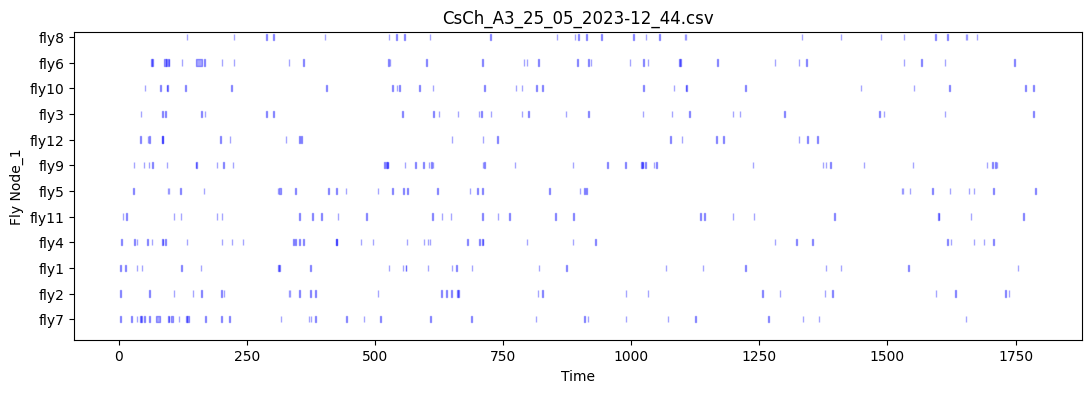

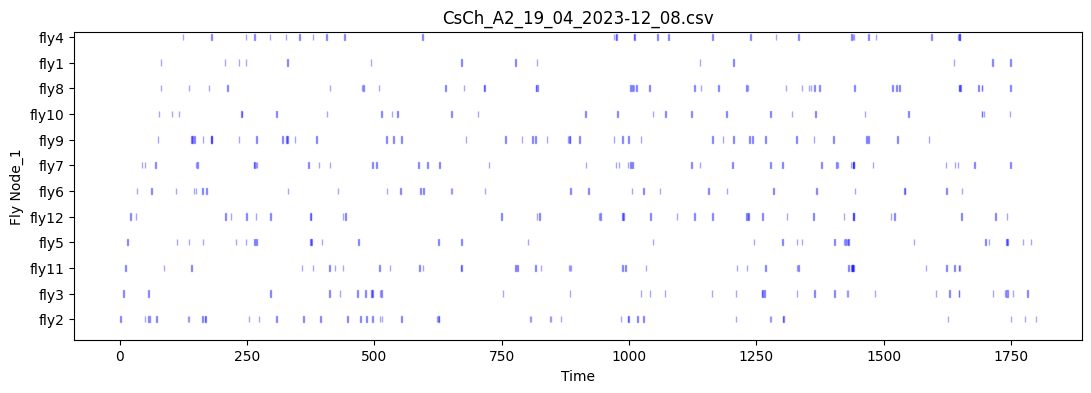

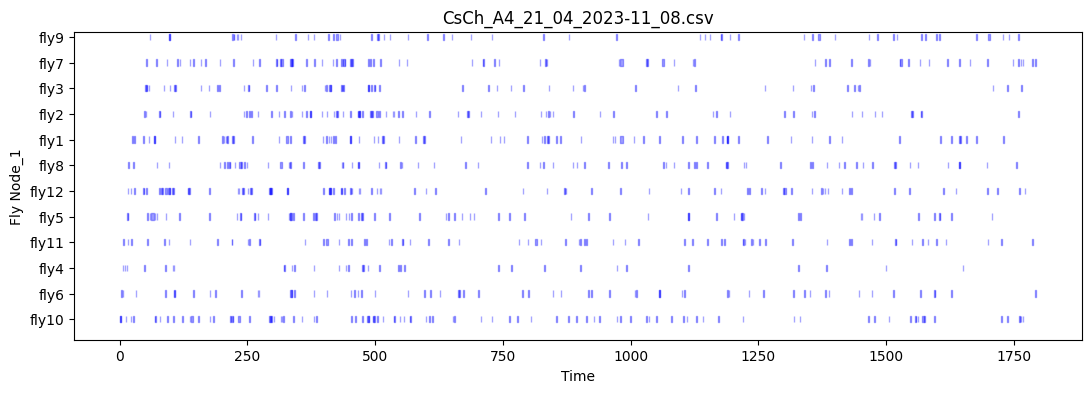

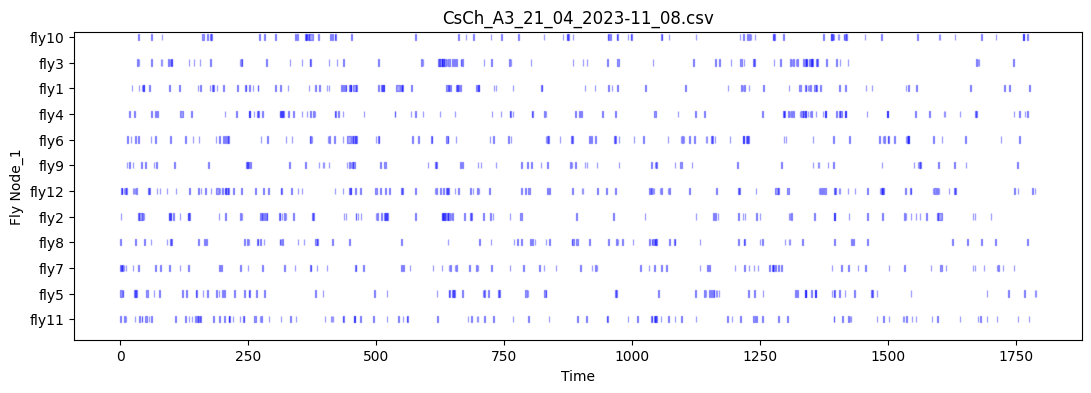

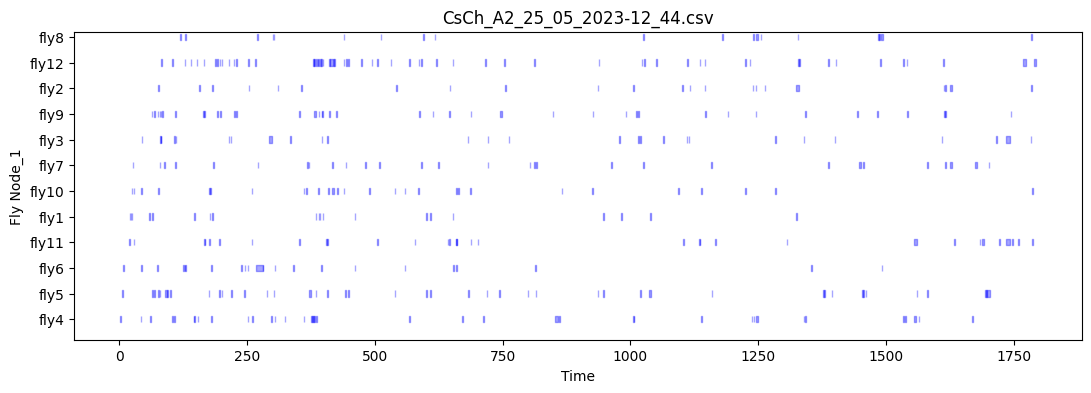

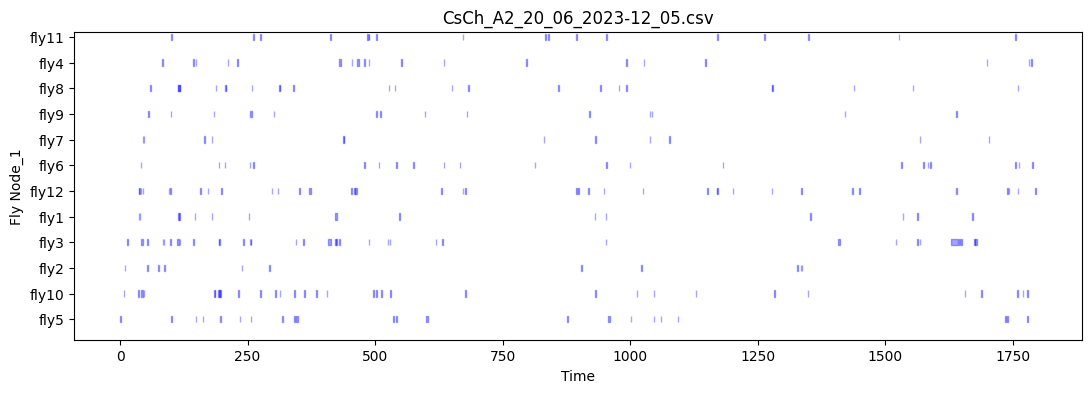

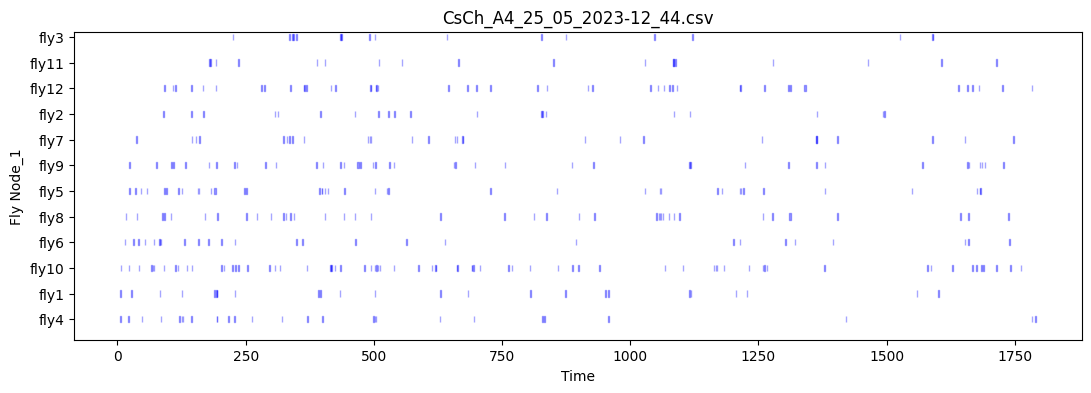

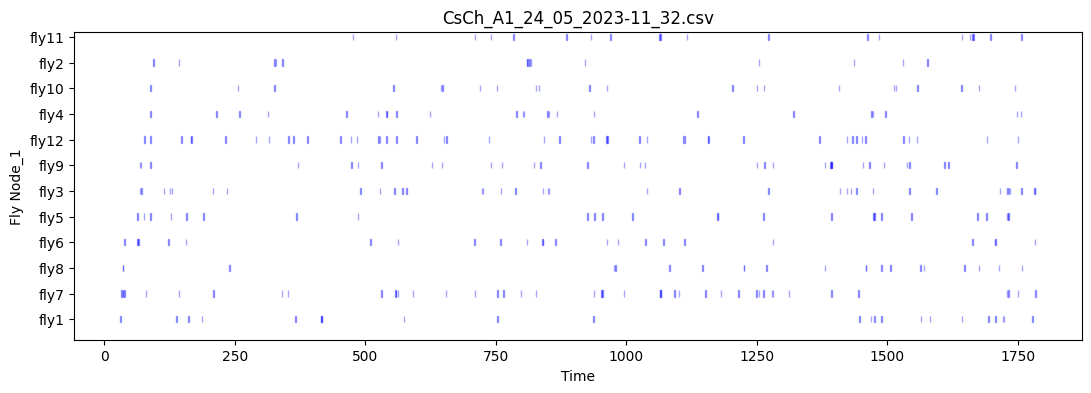

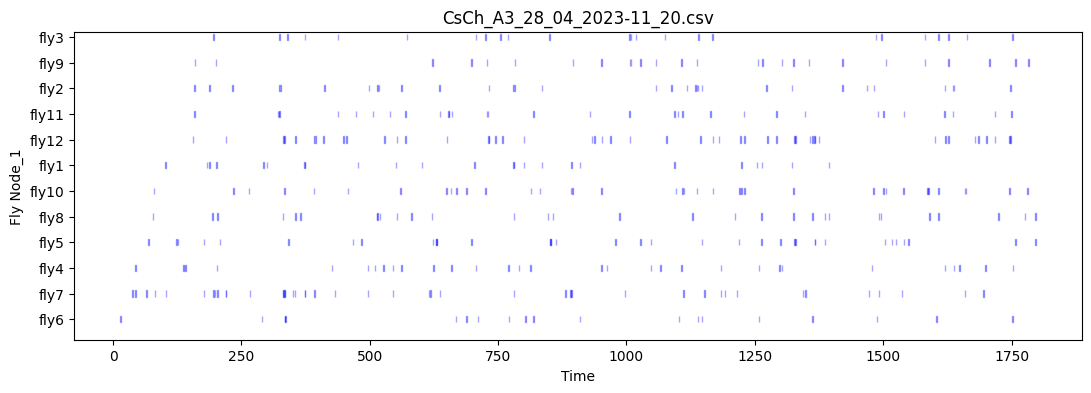

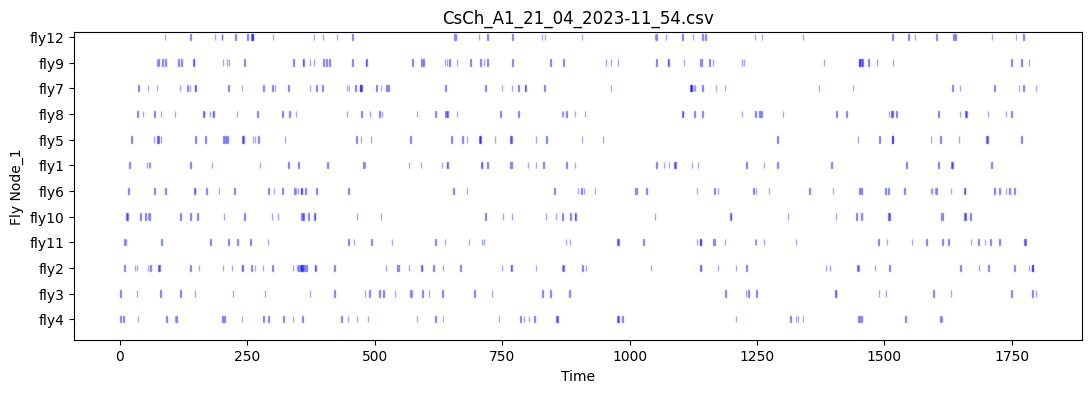

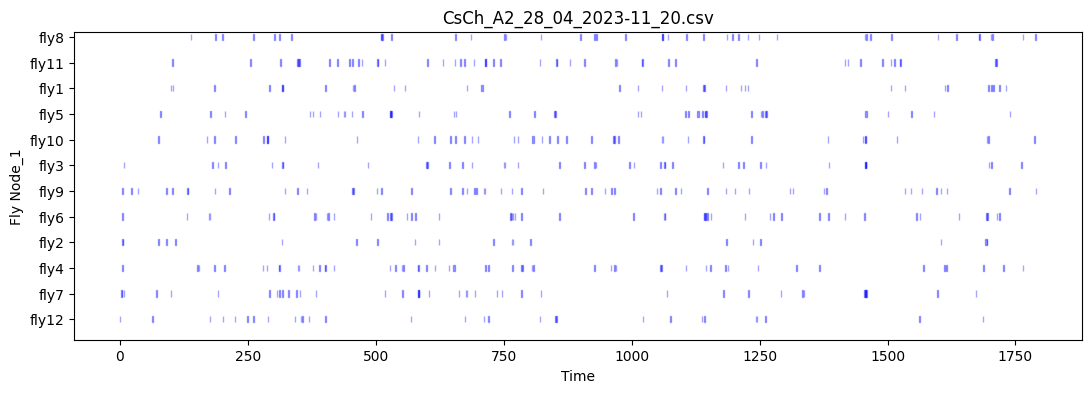

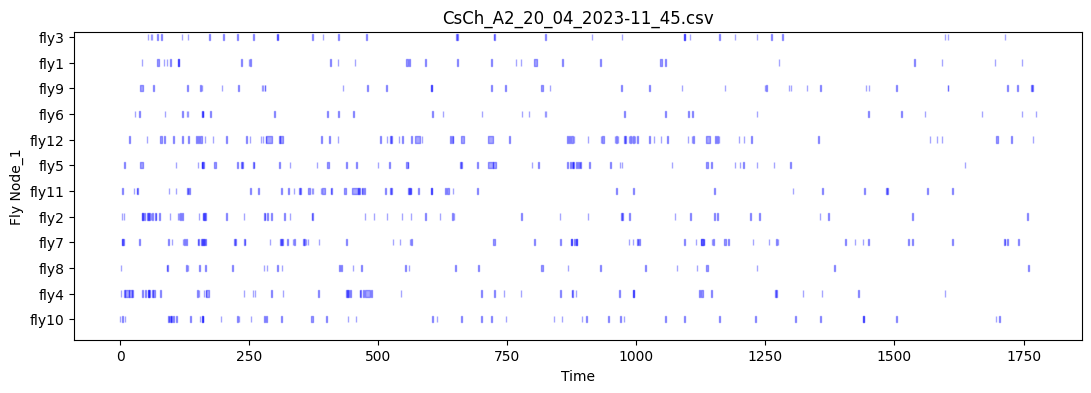

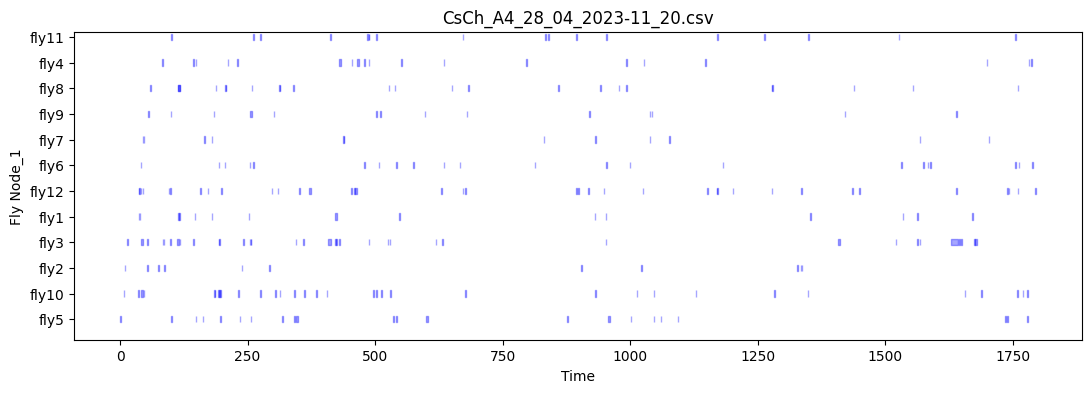

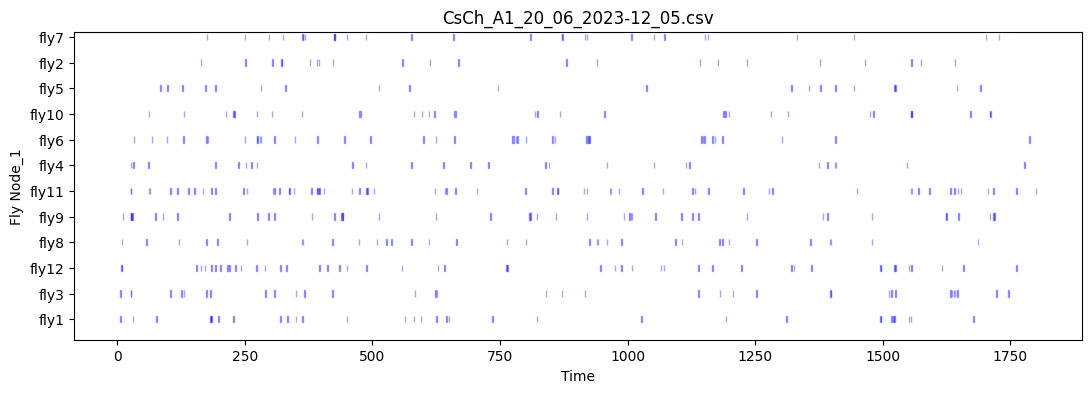

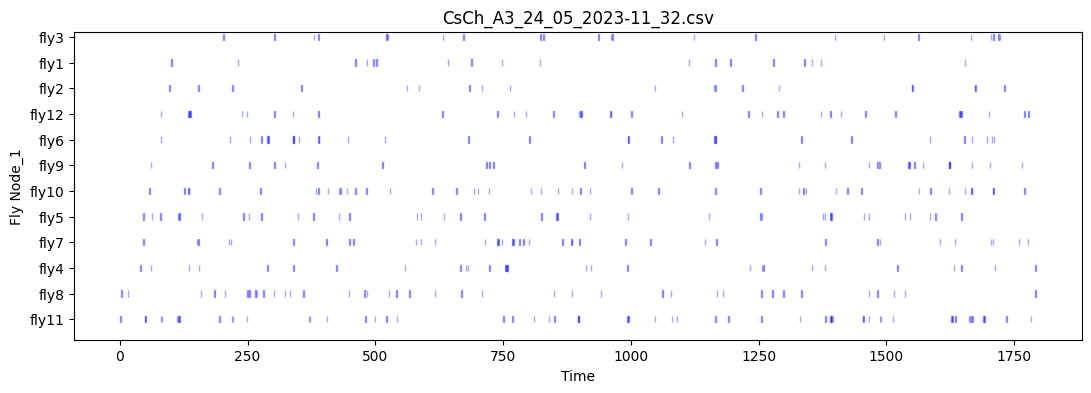

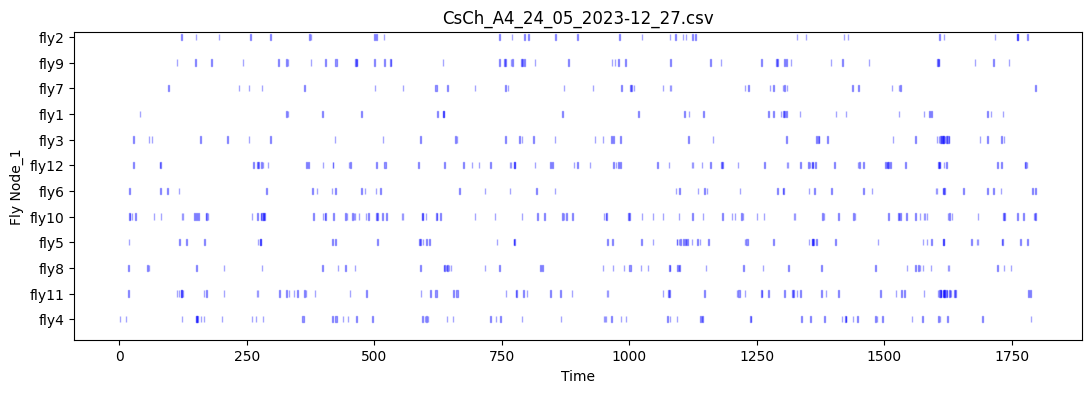

In [3]:
import pandas as pd
from src.utils import fileio
import matplotlib.pyplot as plt
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

path = "/home/milky/drosophila-SNA/data/processed/1_0_find_interactions/CsCh"

files = fileio.load_files_from_folder(path)

for file_name, file_path in files.items():
    plt.figure(figsize=(13, 4))
    df = pd.read_csv(file_path)

    for idx, node_1_value in enumerate(df["node_1"].unique(), start=1):
        node_1_df = df[df["node_1"] == node_1_value]

        for _, interaction in node_1_df.iterrows():
            plt.fill_between([interaction["start_of_interaction"]/24, interaction["end_of_interaction"]/24],
                             [idx - 0.12, idx - 0.12],
                             [idx + 0.12, idx + 0.12],
                             alpha=0.35, color='blue')

    plt.xlabel('Time')
    plt.ylabel('Fly Node_1')
    plt.title(file_name)
    plt.ylim(0.2, len(df["node_1"].unique()) + 0.2)  # Adjust y-axis limit to accommodate all node_1 values

    plt.yticks(range(1, len(df["node_1"].unique()) + 1), df["node_1"].unique())  # Set y-axis ticks as node_1 values

    plt.show()
    # sys.exit()


In [19]:
import numpy as np
import pandas as pd
from src.utils import fileio
import matplotlib.pyplot as plt
import os, sys
from src import settings

def calculate_burstiness(event_times):
    if len(event_times) < 2: raise ValueError("At least two event times are required to calculate inter-event times.")
    
    inter_event_times = np.diff(sorted(event_times))
    mu = np.mean(inter_event_times)
    sigma = np.std(inter_event_times)
    
    if sigma + mu == 0:
        return 0.0  # This implies no variation in inter-event times (completely regular)
    
    burstiness = (sigma - mu) / (sigma + mu)
    return burstiness

config = fileio.get_config(settings.CONFIG_NAME)

OUTPUT_DIR = os.path.join(settings.REPORTS_DIR, "figures", "distance_interaction_comparison")
os.makedirs(OUTPUT_DIR, exist_ok=True)

TIME_WINDOW = config["TIME_WINDOW"]

for TREATMENT in config["TREATMENTS"]:
    path = f"/srv/milky/drosophila-datasets/drosophila-isolation/data/processed/1_0_find_interactions/{TREATMENT}"
    files = fileio.load_files_from_folder(path)

    burstnest_values = []
    for file_name, file_path in files.items():
        df = pd.read_csv(file_path)
        event_times = df['start_of_interaction'].to_list()
        burstiness = calculate_burstiness(event_times)
        burstnest_values.append(burstiness)
    
    print(f"{TREATMENT} {sum(burstnest_values) / len(burstnest_values)}")

CS_10D 0.13315284042956543
CsCh 0.08875619859434822
Cs_5DIZ 0.08710632906262208
LDA_5DIZ 0.08522668114298824
LDA_OCT_5DIZ 0.11164208031247211
OCT_5DIZ 0.09837064144832355


In [ ]:
nodes = [
    'fly1',
    'fly2',
    'fly3',
    'fly4',
    'fly5',
    'fly6',
    'fly7',
    'fly8',
    'fly9',
    'fly10',
    'fly11',
    'fly12'
]

df_node_burstnes = pd.DataFrame()
for TREATMENT in config["TREATMENTS"]:
    path = f"/srv/milky/drosophila-datasets/drosophila-isolation/data/processed/1_0_find_interactions/{TREATMENT}"
    files = fileio.load_files_from_folder(path)

    burstnest_values = []

    for file_name, file_path in files.items():
        df = pd.read_csv(file_path)
        event_times = df['start_of_interaction'].to_list()
        burstiness = calculate_burstiness(event_times)

        # print(f"{file_name} {burstiness}")
        # res = pd.DataFrame({'b ': [burstiness]})
        # res['group'] = file_name.replace('.csv', '')
        # res['treatment'] = TREATMENT  
        b = []
        for node in nodes:
            filtered_df = df[df['node_1'] == node]
            event_times = filtered_df['start_of_interaction'].to_list()
            if event_times:
                burstiness = calculate_burstiness(event_times)

            burstnest_values.append(burstiness)
            b.append(burstiness)
        res = pd.DataFrame({"b": b})
        res = res.rename_axis('fly')
        res = res.reset_index()
        res['group'] = file_name.replace('.csv', '')
        res['treatment'] = TREATMENT

        # res = res.T
        df_node_burstnes = pd.concat([df_node_burstnes, res], axis=0)

df_node_burstnes = df_node_burstnes.set_index(['treatment', 'group', 'fly']) #for node level
# df_node_burstnes.columns = ['b']
# df_node_burstnes = df_node_burstnes.set_index(['treatment', 'group'])



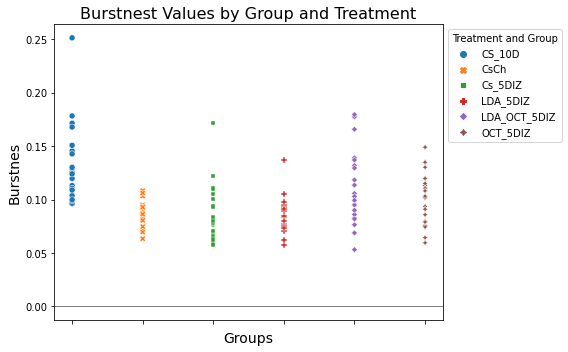

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_node_burstnes,
    x='treatment',  # Separate groups along the x-axis
    y='b',  # Plot values on the y-axis
    hue='treatment',  # Color by treatment
    style='treatment',  # Optional: Different markers by treatment
    # palette='Set2',  # Use a color palette for treatments
    # s=50  # Marker size
)

# Customize plot
plt.title('Burstnest Values by Group and Treatment', fontsize=16)
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Burstnes', fontsize=14)
plt.legend(title='Treatment', fontsize=12)

plt.gca().set_xticklabels([]) 
plt.axhline(0, color='gray', linestyle='-', linewidth=1)
plt.legend(title='Treatment and Group', fontsize=10, bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()

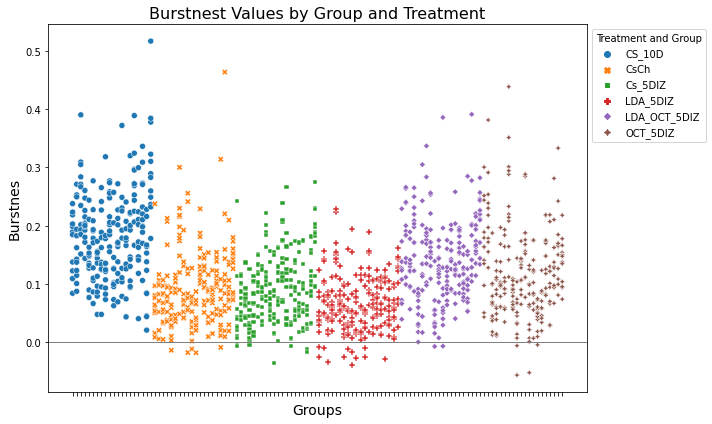

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_node_burstnes,
    x='group',  # Separate groups along the x-axis
    y='b',  # Plot values on the y-axis
    hue='treatment',  # Color by treatment
    style='treatment',  # Optional: Different markers by treatment
    # palette='Set2',  # Use a color palette for treatments
    # s=50  # Marker size
)

# Customize plot
plt.title('Burstnest Values by Group and Treatment', fontsize=16)
plt.xlabel('Groups', fontsize=14)
plt.ylabel('Burstnes', fontsize=14)
plt.legend(title='Treatment', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)

plt.gca().set_xticklabels([]) 
plt.axhline(0, color='gray', linestyle='-', linewidth=1)
plt.legend(title='Treatment and Group', fontsize=10, bbox_to_anchor=(1.0, 1), loc='upper left')

plt.tight_layout()
plt.show()

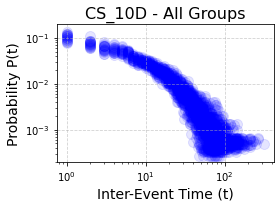

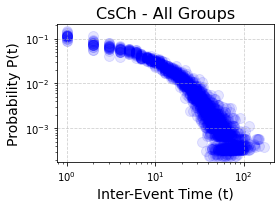

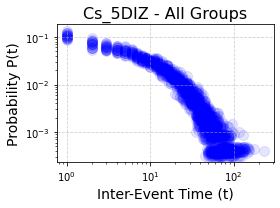

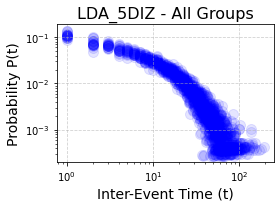

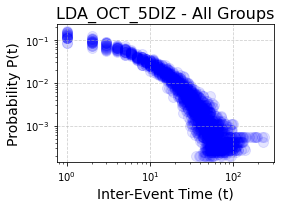

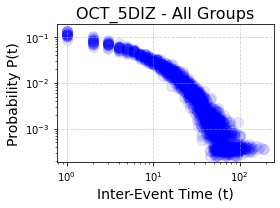

In [140]:
for TREATMENT in config["TREATMENTS"]:
    path = f"/srv/milky/drosophila-datasets/drosophila-isolation/data/processed/1_0_find_interactions/{TREATMENT}"
    files = fileio.load_files_from_folder(path)
    all_unique_times = []
    all_probabilities = []
    for group_name, group_path in files.items():
        df = pd.read_csv(group_path)
        event_times = df['start_of_interaction'].to_list()
        inter_event_times = np.diff(sorted(event_times))
        def degree_probability(times):
            unique_times, counts = np.unique(times, return_counts=True)
            probabilities = counts / sum(counts)  # Normalize counts to get probabilities
            return unique_times, probabilities

        unique_times, probabilities = degree_probability(inter_event_times)
        all_unique_times.extend(unique_times)
        all_probabilities.extend(probabilities)

    plt.figure(figsize=(4, 3))
    plt.scatter(all_unique_times, all_probabilities, color='blue', label='P(t)', s=100, alpha=0.1)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'{TREATMENT} - All Groups', fontsize=16)
    plt.xlabel('Inter-Event Time (t)', fontsize=14)
    plt.ylabel('Probability P(t)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


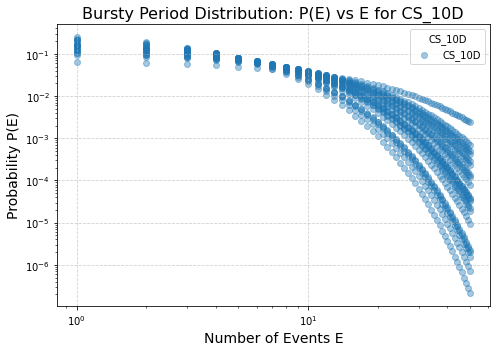

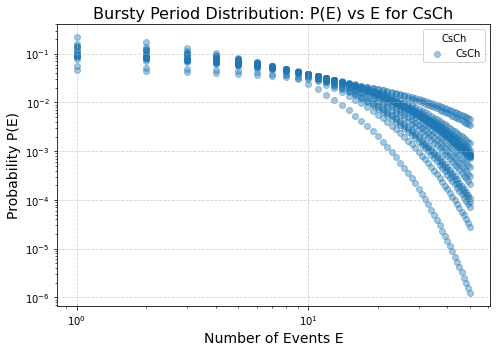

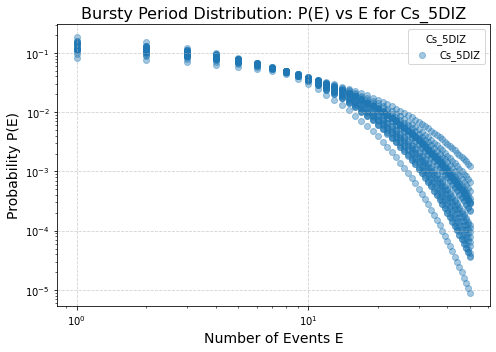

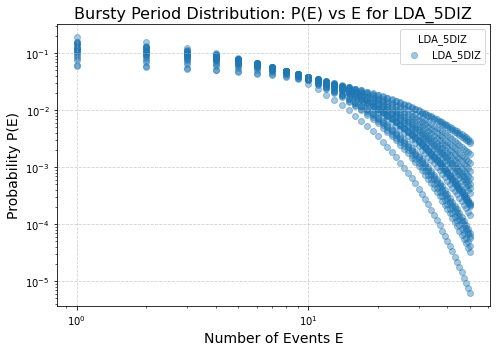

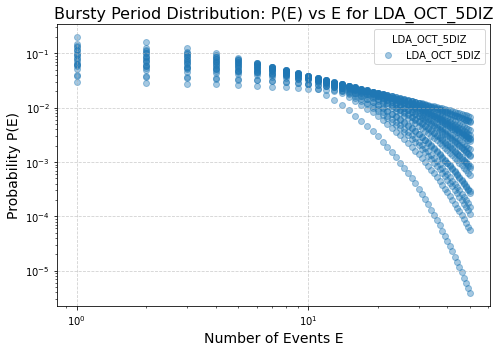

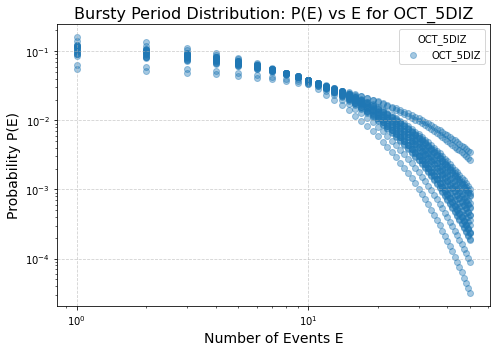

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define function to calculate the probability distribution of inter-event times
def degree_probability(times):
    unique_times, counts = np.unique(times, return_counts=True)
    probabilities = counts / sum(counts)  # Normalize counts to get probabilities
    return unique_times, probabilities

# Define function to calculate P(E = n)
def calculate_P_E(n, C_delta_t):
    return (C_delta_t ** (n - 1)) * (1 - C_delta_t)

# Set the time window (Delta t) for bursty periods
Delta_t = 24*1  # Adjust this value based on your data

all_unique_times = []
all_probabilities = []
for TREATMENT in config["TREATMENTS"]:
    path = f"/srv/milky/drosophila-datasets/drosophila-isolation/data/processed/1_0_find_interactions/{TREATMENT}"
    files = fileio.load_files_from_folder(path)
    results = {}
    all_E_values = []
    all_P_E_values = []

    for group_name, group_path in files.items():
        df = pd.read_csv(group_path)
        event_times = df['start_of_interaction'].to_list()
        inter_event_times = np.diff(sorted(event_times))  # Calculate inter-event times
        unique_times, probabilities = degree_probability(inter_event_times)
        C_delta_t = np.sum(probabilities[unique_times <= Delta_t])  # Sum probabilities of inter-event times <= Delta_t
        max_events = 50  # Maximum number of events for plotting, adjust if needed
        P_E_values = []

        for n in range(1, max_events + 1):
            P_E = calculate_P_E(n, C_delta_t)
            P_E_values.append(P_E)

        all_E_values.extend(np.arange(1, max_events + 1))
        all_P_E_values.extend(P_E_values)

    plt.figure(figsize=(7, 5))
    plt.scatter(all_E_values, all_P_E_values, label=f'{TREATMENT}', alpha=0.4)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Bursty Period Distribution: P(E) vs E for {TREATMENT}', fontsize=16)
    plt.xlabel('Number of Events E', fontsize=14)
    plt.ylabel('Probability P(E)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right', title=f"{TREATMENT}")
    plt.tight_layout()
    plt.show()
    # sys.exit()

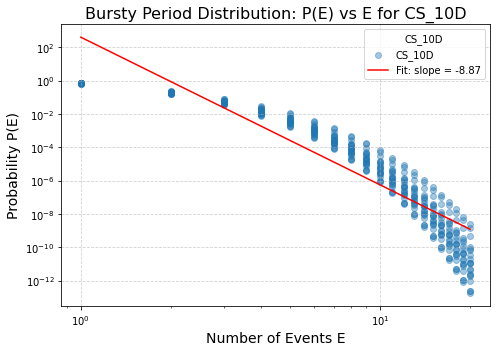

CS_10D - Slope (power-law exponent): -8.87


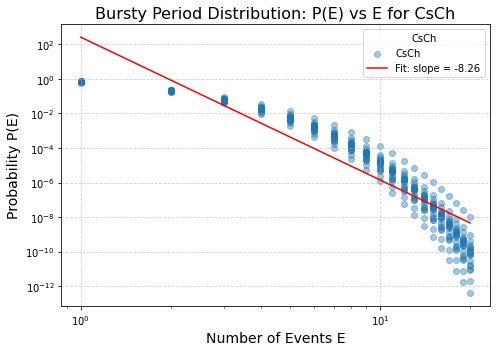

CsCh - Slope (power-law exponent): -8.26


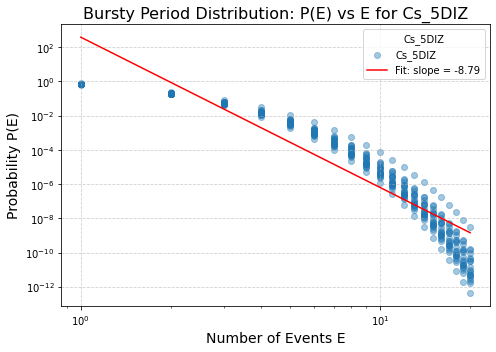

Cs_5DIZ - Slope (power-law exponent): -8.79


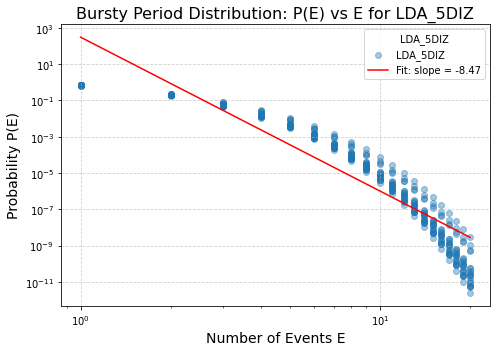

LDA_5DIZ - Slope (power-law exponent): -8.47


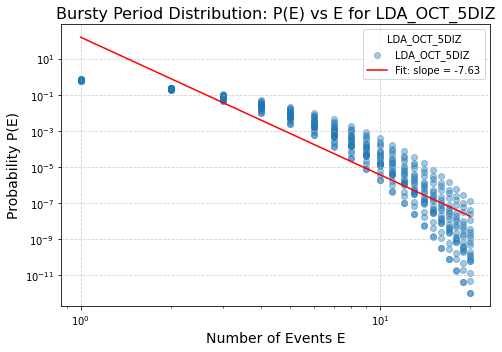

LDA_OCT_5DIZ - Slope (power-law exponent): -7.63


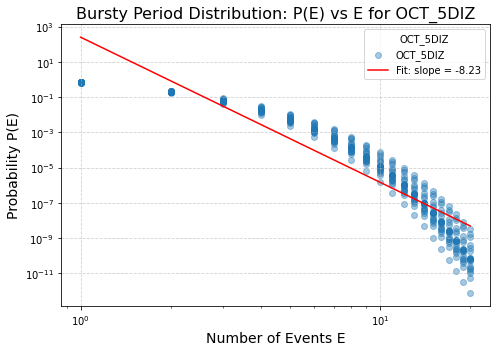

OCT_5DIZ - Slope (power-law exponent): -8.23


In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

# Define function to calculate the probability distribution of inter-event times
def degree_probability(times):
    unique_times, counts = np.unique(times, return_counts=True)
    probabilities = counts / sum(counts)  # Normalize counts to get probabilities
    return unique_times, probabilities

# Define function to calculate P(E = n)
def calculate_P_E(n, C_delta_t):
    return (C_delta_t ** (n - 1)) * (1 - C_delta_t)

# Set the time window (Delta t) for bursty periods
Delta_t = 12  # Adjust this value based on your data

all_unique_times = []
all_probabilities = []
for TREATMENT in config["TREATMENTS"]:
    path = f"/srv/milky/drosophila-datasets/drosophila-isolation/data/processed/1_0_find_interactions/{TREATMENT}"
    files = fileio.load_files_from_folder(path)
    results = {}
    all_E_values = []
    all_P_E_values = []

    for group_name, group_path in files.items():
        df = pd.read_csv(group_path)
        event_times = df['start_of_interaction'].to_list()
        inter_event_times = np.diff(sorted(event_times))  # Calculate inter-event times
        unique_times, probabilities = degree_probability(inter_event_times)
        C_delta_t = np.sum(probabilities[unique_times <= Delta_t])  # Sum probabilities of inter-event times <= Delta_t
        max_events = 20  # Maximum number of events for plotting, adjust if needed
        P_E_values = []

        for n in range(1, max_events + 1):
            P_E = calculate_P_E(n, C_delta_t)
            P_E_values.append(P_E)

        all_E_values.extend(np.arange(1, max_events + 1))
        all_P_E_values.extend(P_E_values)

    # Convert E and P(E) values to log scale for power-law fitting
    log_E_values = np.log10(all_E_values)
    log_P_E_values = np.log10(all_P_E_values)

    # Step 1: Fit a linear model (linear regression) to the log-log data
    model = LinearRegression()
    model.fit(log_E_values.reshape(-1, 1), log_P_E_values)

    # Step 2: Get the slope (exponent of the power law)
    slope = model.coef_[0]

    # Step 3: Plotting the data and the fitted line
    plt.figure(figsize=(7, 5))
    plt.scatter(all_E_values, all_P_E_values, label=f'{TREATMENT}', alpha=0.4)
    plt.plot(all_E_values, 10 ** model.predict(log_E_values.reshape(-1, 1)), color='red', label=f'Fit: slope = {slope:.2f}')
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Bursty Period Distribution: P(E) vs E for {TREATMENT}', fontsize=16)
    plt.xlabel('Number of Events E', fontsize=14)
    plt.ylabel('Probability P(E)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right', title=f"{TREATMENT}")
    plt.tight_layout()
    plt.show()

    # Print the slope (exponent of the power law)
    print(f'{TREATMENT} - Slope (power-law exponent): {slope:.2f}')


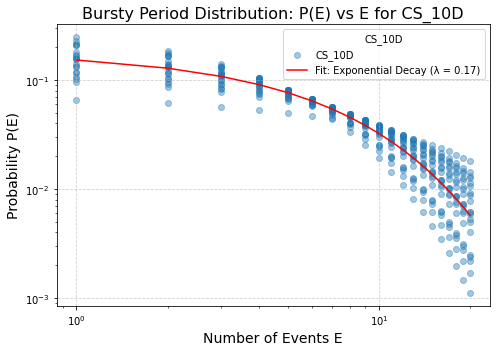

CS_10D - Exponential Decay Parameter (lambda): 0.17


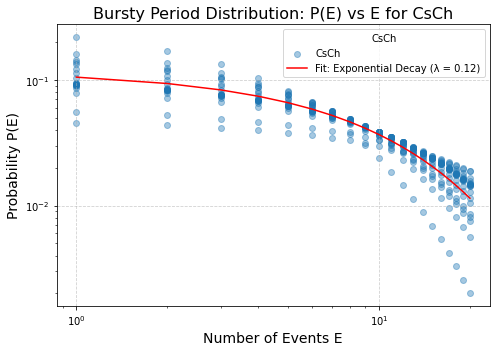

CsCh - Exponential Decay Parameter (lambda): 0.12


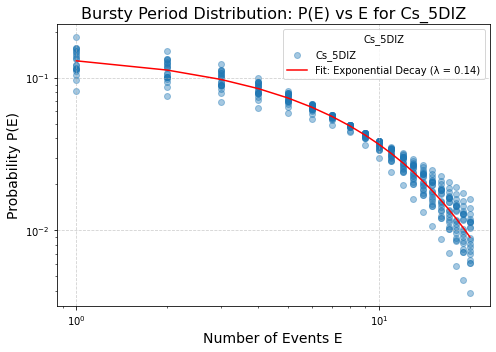

Cs_5DIZ - Exponential Decay Parameter (lambda): 0.14


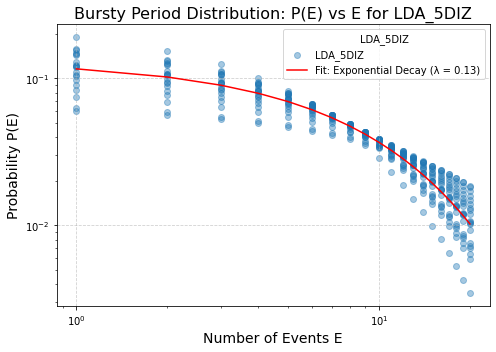

LDA_5DIZ - Exponential Decay Parameter (lambda): 0.13


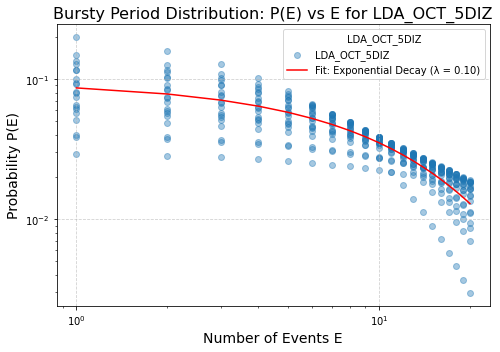

LDA_OCT_5DIZ - Exponential Decay Parameter (lambda): 0.10


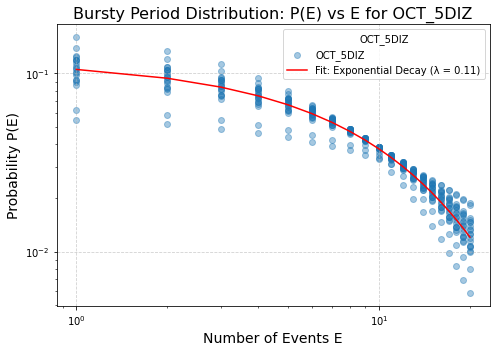

OCT_5DIZ - Exponential Decay Parameter (lambda): 0.11


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.optimize import curve_fit

# Define function to calculate the probability distribution of inter-event times
def degree_probability(times):
    unique_times, counts = np.unique(times, return_counts=True)
    probabilities = counts / sum(counts)  # Normalize counts to get probabilities
    return unique_times, probabilities

# Define function to calculate P(E = n)
def calculate_P_E(n, C_delta_t):
    return (C_delta_t ** (n - 1)) * (1 - C_delta_t)

# Define exponential function for fitting
def exponential_func(E, A, lambda_):
    return A * np.exp(-lambda_ * E)

# Set the time window (Delta t) for bursty periods
Delta_t = 24  # Adjust this value based on your data

all_unique_times = []
all_probabilities = []
for TREATMENT in config["TREATMENTS"]:
    path = f"/srv/milky/drosophila-datasets/drosophila-isolation/data/processed/1_0_find_interactions/{TREATMENT}"
    files = fileio.load_files_from_folder(path)
    results = {}
    all_E_values = []
    all_P_E_values = []

    for group_name, group_path in files.items():
        df = pd.read_csv(group_path)
        event_times = df['start_of_interaction'].to_list()
        inter_event_times = np.diff(sorted(event_times))  # Calculate inter-event times
        unique_times, probabilities = degree_probability(inter_event_times)
        C_delta_t = np.sum(probabilities[unique_times <= Delta_t])  # Sum probabilities of inter-event times <= Delta_t
        max_events = 20  # Maximum number of events for plotting, adjust if needed
        P_E_values = []

        for n in range(1, max_events + 1):
            P_E = calculate_P_E(n, C_delta_t)
            P_E_values.append(P_E)

        all_E_values.extend(np.arange(1, max_events + 1))
        all_P_E_values.extend(P_E_values)

    # Step 1: Fit an exponential decay function to the data
    E_values = np.array(all_E_values)
    P_E_values = np.array(all_P_E_values)

    max_P_E = max(P_E_values)
    avg_E = np.mean(E_values)
    p0 = [max_P_E, 1 / avg_E]  # Adjust initial guess based on the data

    # Use curve fitting to find A and lambda
    params, covariance = curve_fit(exponential_func, E_values, P_E_values, p0=p0)  # Initial guess for A and lambda
    A, lambda_ = params

    # Step 2: Generate the fitted curve
    fitted_P_E_values = exponential_func(E_values, *params)
    # Step 3: Plotting the data and the fitted exponential curve
    plt.figure(figsize=(7, 5))
    plt.scatter(E_values, P_E_values, label=f'{TREATMENT}', alpha=0.4)
    plt.plot(E_values[:max_events], fitted_P_E_values[:max_events], color='red', label=f'Fit: Exponential Decay (λ = {lambda_:.2f})')

    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Bursty Period Distribution: P(E) vs E for {TREATMENT}', fontsize=16)
    plt.xlabel('Number of Events E', fontsize=14)
    plt.ylabel('Probability P(E)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right', title=f"{TREATMENT}")
    plt.tight_layout()
    plt.show()

    # Print the decay rate (lambda)
    print(f'{TREATMENT} - Exponential Decay Parameter (lambda): {lambda_:.2f}')


In [196]:
# event_times
# max(inter_event_times)
# unique_times
# C_delta_t = np.sum(probabilities[unique_times <= Delta_t])

143